# Masksembles for Uncertainty Estimation: Regression

### Installing Masksenbles

<code>pip install git+http://github.com/nikitadurasov/masksembles<\code>

### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from masksembles.keras import Masksembles1D
from sklearn import datasets

### Load test dataset: California Housing

In [2]:
data = datasets.fetch_california_housing()

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---
Lets' make a dataframe to view the data more easily

In [4]:
# Instance an empty dictionary used to create the dataframe
df_dic = {}

# Organize the features into the dictionary
for idx, feature_name in enumerate(data.feature_names):
    df_dic[feature_name] = data.data.T[idx]

# Organize the target into the dictionary    
for target_name in data.target_names:
    df_dic[target_name] = data.target
    
df = pd.DataFrame(df_dic)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


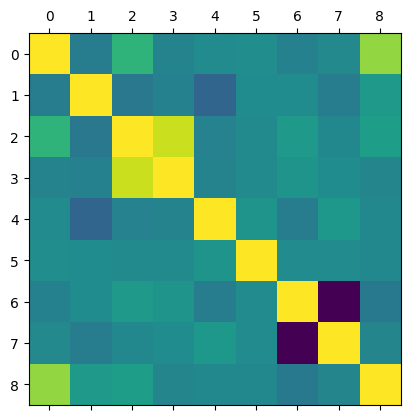

In [6]:
plt.matshow(df.corr())
plt.show()

### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler_features = StandardScaler()
X_unscaled = data.data
X = scaler_features.fit_transform(X_unscaled)


scaler_target = StandardScaler()
y_unscaled = data.target.reshape(-1, 1)
y = scaler_target.fit_transform(y_unscaled)

### Split the data for training and testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2049)

### Build/train a simple deterministic model

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
input_layer = Input(shape=(8,))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='mean_squared_error')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,577
Trainable params: 12,577
Non-trainable params: 0
_________________________________________________________

2024-10-07 17:19:09.014492: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-07 17:19:09.014768: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GTCWK05): /proc/driver/nvidia/version does not exist
2024-10-07 17:19:09.018100: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-10-07 17:19:12.537345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
516/516 [==============================] - 2s 4ms/step - loss: 0.3550
Epoch 2/40
516/516 [==============================] - 2s 4ms/step - loss: 0.2813
Epoch 3/40
516/516 [==============================] - 2s 3ms/step - loss: 0.2513
Epoch 4/40
516/516 [==============================] - 2s 3ms/step - loss: 0.2440
Epoch 5/40
516/516 [==============================] - 1s 2ms/step - loss: 0.2438
Epoch 6/40
516/516 [==============================] - 0s 828us/step - loss: 0.2340
Epoch 7/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2208
Epoch 8/40
516/516 [==============================] - 0s 766us/step - loss: 0.2226
Epoch 9/40
516/516 [==============================] - 0s 716us/step - loss: 0.2186
Epoch 10/40
516/516 [==============================] - 0s 757us/step - loss: 0.2108
Epoch 11/40
516/516 [==============================] - 0s 738us/step - loss: 0.2067
Epoch 12/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2030
Epoch 13/40
516

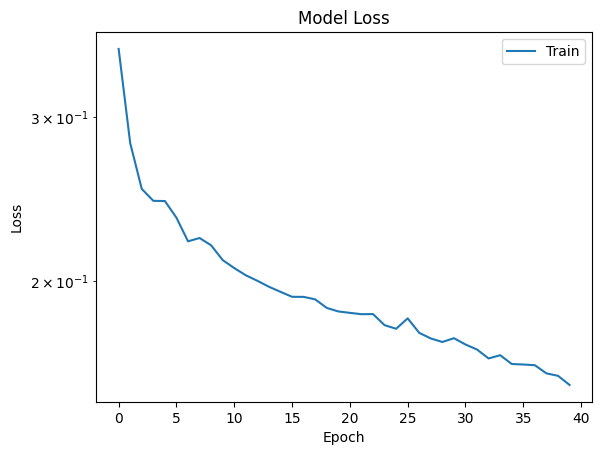

In [11]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Test the deterministic model

In [12]:
loss = model.evaluate(X_test, y_test, verbose=0)
loss

0.19995428621768951

In [13]:
y_pred = model.predict(X_test, verbose=0)
target_pred = scaler_target.inverse_transform(y_pred)
target_test = scaler_target.inverse_transform(y_test)

error = target_pred - target_test
mse = np.mean(error**2)
print("MSE: {}".format(mse))
mae = np.mean(np.abs(error))
print("MAE: {}".format(mae))

MSE: 0.26624918649593965
MAE: 0.3415544940801634


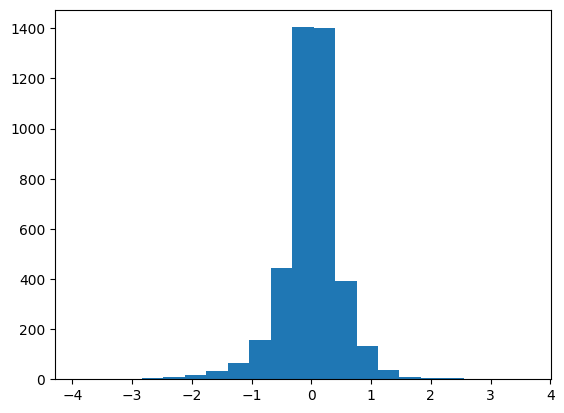

In [14]:
plt.hist(error, bins=21)
plt.show()

### Build/train a probablistic model

In [15]:
from masksembles.keras import Masksembles1D

In [18]:
input_layer = Input(shape=(8,))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
#x = Masksembles1D(32, 2.0)(x)
x = Dense(32, activation='relu')(x)
x = Masksembles1D(n=4, scale=2.0)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='mean_squared_error')

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
masksembles1d_2 (Masksembles (None, 32)                128       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33  

In [22]:
# Shape the train and test to be divisible by 32
print(X_train.shape[0]/32)
print(X_test.shape[0]/32)

516.0
129.0


Epoch 1/40
516/516 [==============================] - 1s 1ms/step - loss: 0.4430
Epoch 2/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2960
Epoch 3/40
516/516 [==============================] - 0s 918us/step - loss: 0.2550
Epoch 4/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2375
Epoch 5/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2284
Epoch 6/40
516/516 [==============================] - 1s 2ms/step - loss: 0.2211
Epoch 7/40
516/516 [==============================] - 0s 927us/step - loss: 0.2166
Epoch 8/40
516/516 [==============================] - 0s 935us/step - loss: 0.2132
Epoch 9/40
516/516 [==============================] - 1s 1ms/step - loss: 0.2098
Epoch 10/40
516/516 [==============================] - 1s 2ms/step - loss: 0.2075
Epoch 11/40
516/516 [==============================] - 0s 913us/step - loss: 0.2039
Epoch 12/40
516/516 [==============================] - 1s 986us/step - loss: 0.2026
Epoch 13/40
516

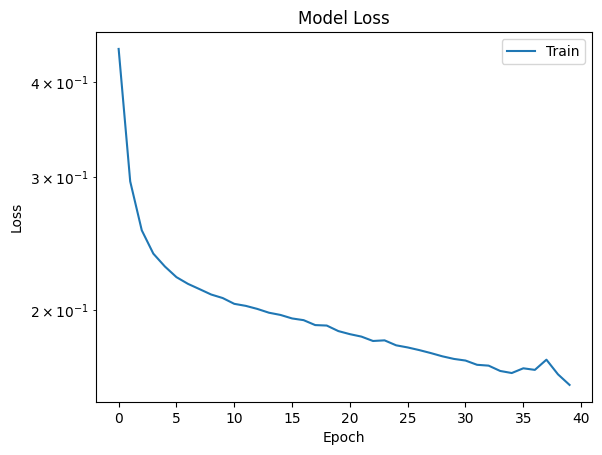

In [23]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1, shuffle=False)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Test the probablistic model

In [24]:
loss = model.evaluate(X_test, y_test, verbose=0)
loss

0.33055737614631653

In [25]:
y_pred = model.predict(X_test, verbose=0)
target_pred = scaler_target.inverse_transform(y_pred)
target_test = scaler_target.inverse_transform(y_test)

error = target_pred - target_test
mse = np.mean(error**2)
print("MSE: {}".format(mse))
mae = np.mean(np.abs(error))
print("MAE: {}".format(mae))

MSE: 0.4401538704015627
MAE: 0.3746820995540859


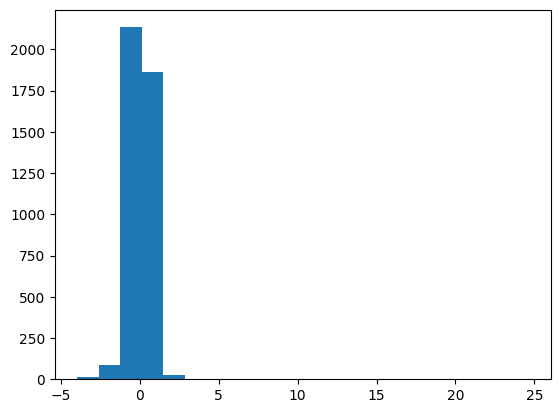

In [26]:
plt.hist(error, bins=21)
plt.show()

### Make probablistic predictions

In [28]:
X_test.shape

(4128, 8)

In [44]:
%%time
X_test_stacked = np.repeat(X_test, 32, axis=0)
y_pred = model.predict(X_test_stacked)
y_pred = y_pred.reshape(-1,32) 

CPU times: user 2.38 s, sys: 594 ms, total: 2.97 s
Wall time: 1.68 s


In [48]:
y_mean = y_pred.mean(axis=1)
y_std = y_pred.std(axis=1)

(4128,)

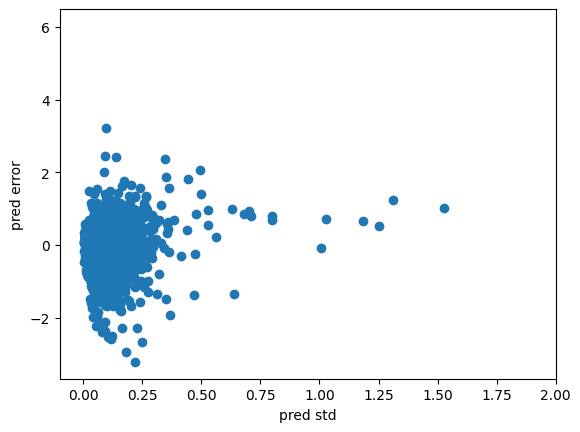

In [60]:
error = y_mean - y_test.flatten()
plt.scatter(y_std, error)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.xlim(-0.1,2)
plt.show()

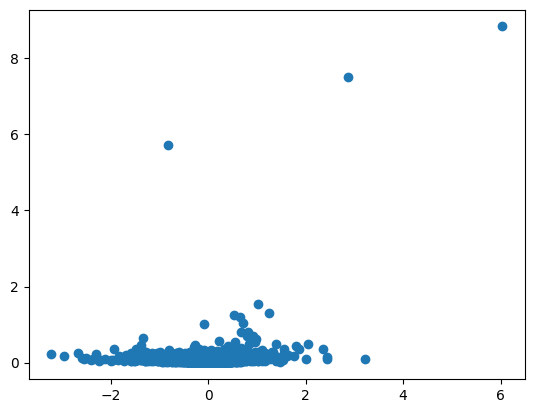

In [57]:
plt.scatter(error, y_std)
plt.show()

In [52]:
error.shape

(4128, 4128)

### train more

Epoch 1/40
516/516 [==============================] - 0s 919us/step - loss: 0.1596
Epoch 2/40
516/516 [==============================] - 0s 902us/step - loss: 0.1581
Epoch 3/40
516/516 [==============================] - 1s 1ms/step - loss: 0.1562
Epoch 4/40
516/516 [==============================] - 0s 832us/step - loss: 0.1554
Epoch 5/40
516/516 [==============================] - 0s 849us/step - loss: 0.1548
Epoch 6/40
516/516 [==============================] - 0s 835us/step - loss: 0.1528
Epoch 7/40
516/516 [==============================] - 0s 819us/step - loss: 0.1504
Epoch 8/40
516/516 [==============================] - 1s 1ms/step - loss: 0.1501
Epoch 9/40
516/516 [==============================] - 0s 849us/step - loss: 0.1489
Epoch 10/40
516/516 [==============================] - 0s 829us/step - loss: 0.1479
Epoch 11/40
516/516 [==============================] - 0s 882us/step - loss: 0.1493
Epoch 12/40
516/516 [==============================] - 0s 869us/step - loss: 0.1486
Epoch

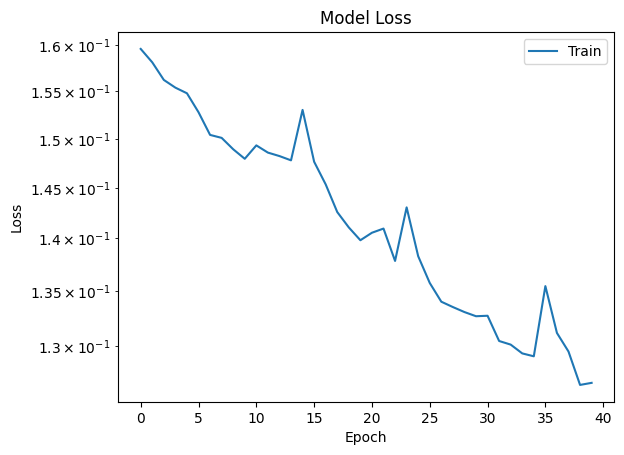

In [61]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1, shuffle=False)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

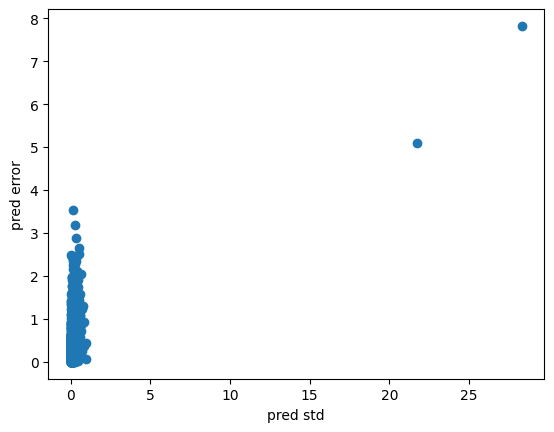

CPU times: user 2.28 s, sys: 625 ms, total: 2.91 s
Wall time: 1.81 s


In [66]:
%%time
X_test_stacked = np.repeat(X_test, 32, axis=0)
y_pred = model.predict(X_test_stacked)
y_pred = y_pred.reshape(-1,32) 

y_mean = y_pred.mean(axis=1)
y_std = y_pred.std(axis=1)

error = y_mean - y_test.flatten()
error = np.abs(error)
plt.scatter(y_std, error)
plt.xlabel('pred std')
plt.ylabel('pred error')
#plt.xlim(-0.1,2)
plt.show()

In [79]:
import seaborn as sns

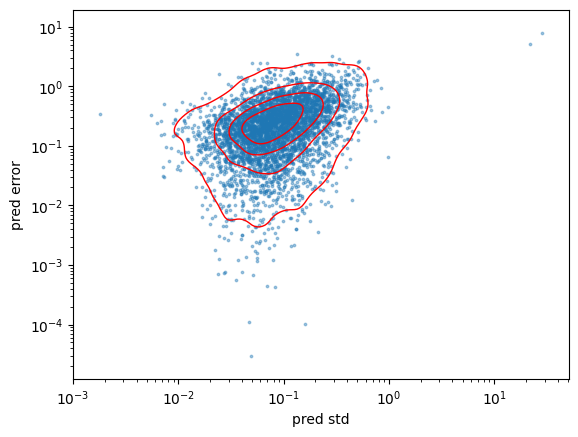

In [81]:
plt.scatter(y_std, error, alpha=0.4, s=3)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.yscale('log')
plt.xscale('log')
sns.kdeplot(x=y_std, y=error, levels=5, color='red', linewidths=1)
plt.show()

### More training

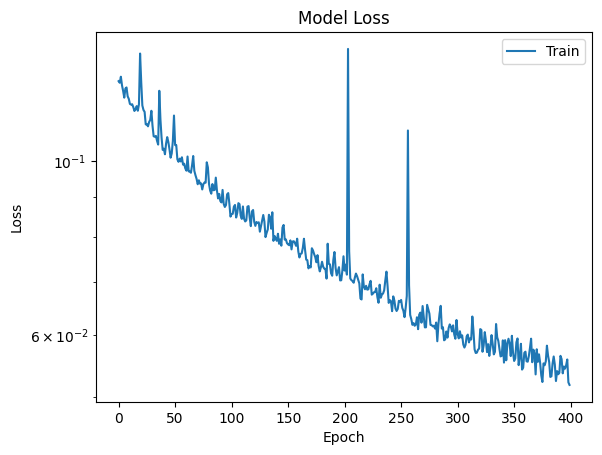

CPU times: user 5min 10s, sys: 2min 13s, total: 7min 24s
Wall time: 2min 38s


In [82]:
%%time

history = model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

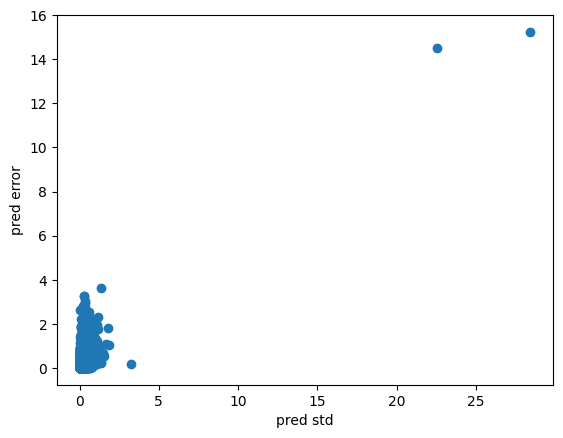

CPU times: user 2.12 s, sys: 812 ms, total: 2.94 s
Wall time: 1.68 s


In [83]:
%%time
X_test_stacked = np.repeat(X_test, 32, axis=0)
y_pred = model.predict(X_test_stacked)
y_pred = y_pred.reshape(-1,32) 

y_mean = y_pred.mean(axis=1)
y_std = y_pred.std(axis=1)

error = y_mean - y_test.flatten()
error = np.abs(error)
plt.scatter(y_std, error)
plt.xlabel('pred std')
plt.ylabel('pred error')
#plt.xlim(-0.1,2)
plt.show()

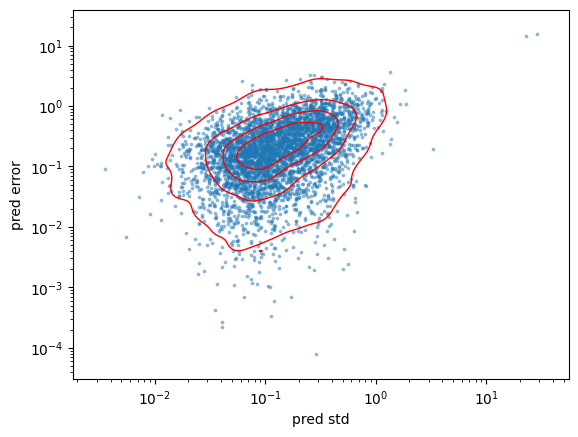

In [84]:
plt.scatter(y_std, error, alpha=0.4, s=3)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.yscale('log')
plt.xscale('log')
sns.kdeplot(x=y_std, y=error, levels=5, color='red', linewidths=1)
plt.show()

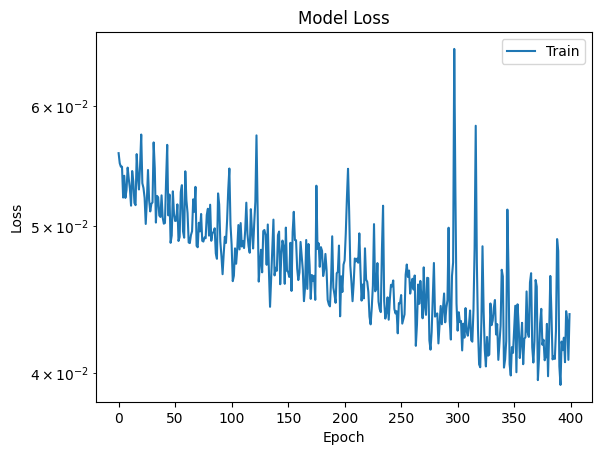

CPU times: user 5min 5s, sys: 2min 16s, total: 7min 21s
Wall time: 2min 39s


In [85]:
%%time

history = model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

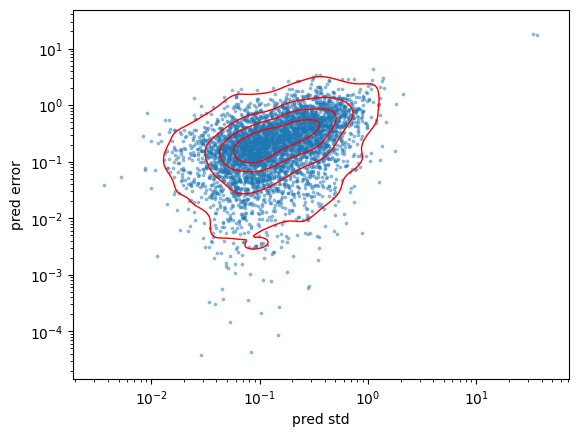

CPU times: user 5.81 s, sys: 422 ms, total: 6.23 s
Wall time: 5.23 s


In [86]:
%%time
X_test_stacked = np.repeat(X_test, 32, axis=0)
y_pred = model.predict(X_test_stacked)
y_pred = y_pred.reshape(-1,32) 
y_mean = y_pred.mean(axis=1)
y_std = y_pred.std(axis=1)
error = y_mean - y_test.flatten()
error = np.abs(error)

plt.scatter(y_std, error, alpha=0.4, s=3)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.yscale('log')
plt.xscale('log')
sns.kdeplot(x=y_std, y=error, levels=5, color='red', linewidths=1)
plt.show()

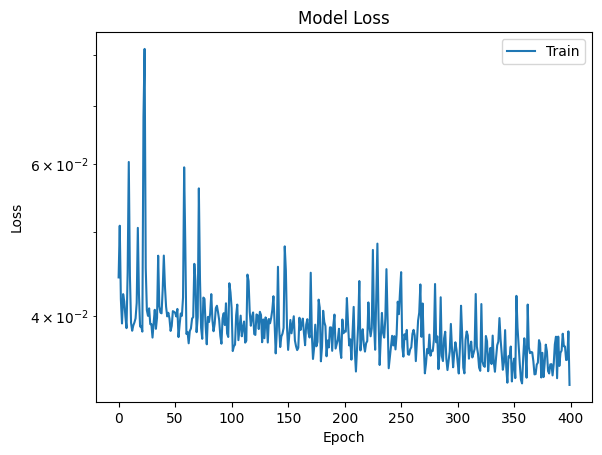

CPU times: user 5min 10s, sys: 2min 17s, total: 7min 27s
Wall time: 2min 38s


In [87]:
%%time

history = model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0, shuffle=False)

plt.plot(history.history['loss'])
plt.yscale('log')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

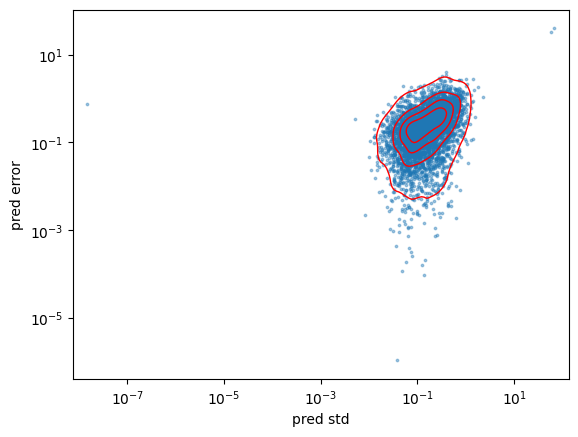

CPU times: user 5.42 s, sys: 594 ms, total: 6.02 s
Wall time: 4.98 s


In [88]:
%%time
X_test_stacked = np.repeat(X_test, 32, axis=0)
y_pred = model.predict(X_test_stacked)
y_pred = y_pred.reshape(-1,32) 
y_mean = y_pred.mean(axis=1)
y_std = y_pred.std(axis=1)
error = y_mean - y_test.flatten()
error = np.abs(error)

plt.scatter(y_std, error, alpha=0.4, s=3)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.yscale('log')
plt.xscale('log')
sns.kdeplot(x=y_std, y=error, levels=5, color='red', linewidths=1)
plt.show()

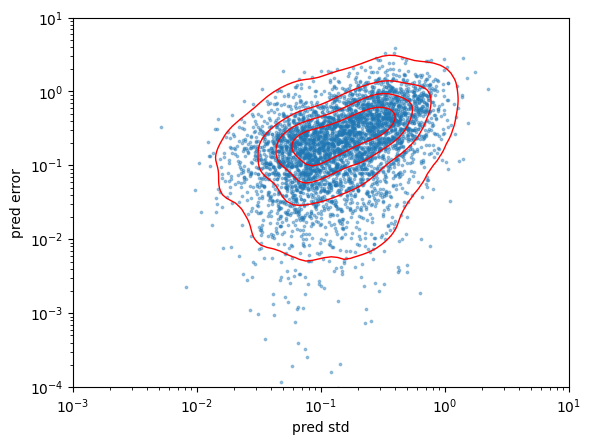

In [92]:
plt.scatter(y_std, error, alpha=0.4, s=3)
plt.xlabel('pred std')
plt.ylabel('pred error')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-3, 10**1)
plt.ylim(10**-4, 10**1)
sns.kdeplot(x=y_std, y=error, levels=5, color='red', linewidths=1)
plt.show()